# Mutual Information for PIF
Modified from the notebook submitted by Team Privately Concerned in July Round 1.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Compute Mutual Information (MI)

def calc_MI(X,Y,bins):
    c_XY = np.histogram2d(X,Y,bins)[0]
    c_X = np.histogram(X,bins)[0]
    c_Y = np.histogram(Y,bins)[0]
    
    H_X = shan_entropy(c_X)
    H_Y = shan_entropy(c_Y)
    H_XY = shan_entropy(c_XY)
    
    MI = H_X + H_Y - H_XY
    return MI

def shan_entropy(c):
    c_normalized = c / float(np.sum(c))
    c_normalized = c_normalized[np.nonzero(c_normalized)]
    H = -sum(c_normalized* np.log2(c_normalized))  
    return H

In [3]:
features = ['gender', 'AGE', 'POSTCODE', 'blood_group', 'eye_color', 'job']
data = pd.read_csv('our-synthetic.csv')[features]
data = data.fillna('Unemployed')

In [4]:
data[:10]

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,F,99,2649,B-,Brown,"Psychologist, counselling"
1,M,108,1780,A-,Hazel,Personnel officer
2,M,59,2940,B+,Hazel,Tourism officer
3,M,58,2945,B+,Blue,Make
4,M,30,2729,AB-,Brown,Forest/woodland manager
5,M,6,2531,A-,Grey,Unemployed
6,F,104,839,B+,Brown,Youth worker
7,M,11,2901,AB-,Grey,Unemployed
8,F,105,846,A-,Green,Camera operator
9,M,115,2912,A+,Grey,Retail merchandiser


In [5]:
# remap gender
data.gender = data.gender.map({'M': 1, 'F': 2})

# remap AGE
uni_age_len = len(data.AGE.unique())
match_dic = data.AGE.unique()
for i in range(uni_age_len):
    data.AGE = data.AGE.replace(match_dic[i],i+1)

# remap POSTCODE
uni_pc_len = len(data.POSTCODE.unique())
match_dic = data.POSTCODE.unique()
for i in range(uni_pc_len):
    data.POSTCODE = data.POSTCODE.replace(match_dic[i],i+1)

# remap blood_group
uni_bg_len = len(data.blood_group.unique())
match_dic = data.blood_group.unique()
for i in range(uni_bg_len):
    data.blood_group = data.blood_group.replace(match_dic[i],i+1)

# remap eye_color
uni_ec_len = len(data.eye_color.unique())
match_dic = data.eye_color.unique()
for i in range(uni_ec_len):
    data.eye_color = data.eye_color.replace(match_dic[i],i+1)

# remap job
uni_job_len = len(data.job.unique()) 
match_dic = data.job.unique()
for i in range(uni_job_len):
    data.job = data.job.replace(match_dic[i],i+1)

In [6]:
data[:10]   

,gender,AGE,POSTCODE,blood_group,eye_color,job
0,2,95,1,1,1,1
1,1,102,2,2,2,2
2,1,59,3,3,2,3
3,1,112,4,3,3,4
4,1,50,5,4,1,5
5,1,6,6,2,4,6
6,2,79,7,3,1,7
7,1,77,8,4,4,6
8,2,115,9,2,5,8
9,1,29,10,5,4,9


In [7]:
A = data[:100].values

In [8]:
bins = 2
n = A.shape[1]
matMI = np.zeros((n, n))

for ix in np.arange(n):
    for jx in np.arange(n):
        matMI[ix,jx] = calc_MI(A[:,ix], A[:,jx], bins)

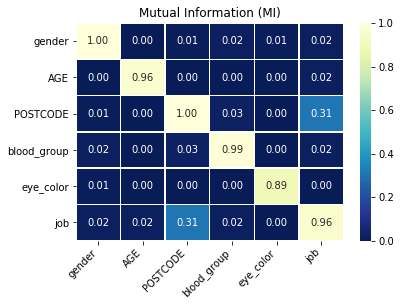

In [9]:
sns_plot=sns.heatmap(matMI,
            cmap="YlGnBu_r",
            vmin=0,
            vmax=1,
            annot=True, linewidths=.5, fmt='.2f'
            )
sns_plot.set_xticklabels(data.columns, rotation=45, ha="right")
sns_plot.set_yticklabels(data.columns, rotation=0)
sns_plot.set_title("Mutual Information (MI)")
plt.show()